In [1]:
import pandas as pd
import numpy as np
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
hits = pd.read_csv('../../data/lcr_fimo.tsv', index_col=0, sep='\t') # output from running fIMO on LCR region (run_fimo.sh)
hits = hits.loc[(hits['sequence_name']=='Unit1'),:]
hits['hit_id'] = hits['motif_alt_id'].str.cat(hits['start'].astype(int).astype(str), sep='_')
hits.index = hits['hit_id']

In [3]:
ad = anndata.read_h5ad('../../data/downloads/buen_ad_sc.h5ad')
cts = ['HSC','MPP','CMP','MEP', 'LMPP','CLP','pDC','GMP']
a = np.load('ism.npy')
# normalize by cell
a_norm = a - np.repeat(a.mean(axis=2)[:,:,np.newaxis], 4, axis=2)

### GATA1

In [ ]:
pwm = pd.read_csv('../../data/GATA1.csv', index_col=0) # converts from meme format (make_pwm.R)
hits_of_interest = hits.loc[hits['motif_alt_id']=='GATA1',:]

start_site = int(hits_of_interest.loc['GATA1_748', 'start']-1)
ism_matrix = a_norm[:,start_site:(start_site+pwm.shape[1]),:]
ad.obs['GATA1_748'] = [np.dot(pwm.transpose().values.flatten(), i.flatten()) for i in ism_matrix]

### plot

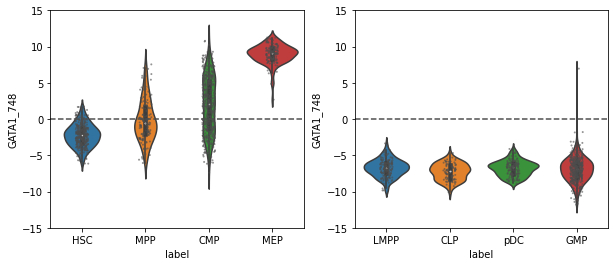

In [8]:
f, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.violinplot(x='label', y='GATA1_748', data=ad.obs, order=['HSC', 'MPP', 'CMP', 'MEP'], ax=axs[0])
sns.stripplot(x='label', y='GATA1_748', data=ad.obs, order=['HSC', 'MPP', 'CMP', 'MEP'], alpha=0.6, color='0.3', size=2, ax=axs[0])
sns.violinplot(x='label', y='GATA1_748', data=ad.obs, order=['LMPP', 'CLP', 'pDC', 'GMP'], ax=axs[1])
sns.stripplot(x='label', y='GATA1_748', data=ad.obs, order=['LMPP', 'CLP', 'pDC', 'GMP'], alpha=0.6, color='0.3', size=2, ax=axs[1])
axs[0].set_ylim(-15, 15)
axs[1].set_ylim(-15, 15)
axs[0].axhline(y=0, linestyle='dashed', color='0.3')
axs[1].axhline(y=0, linestyle='dashed', color='0.3')
#f.savefig('GATA1_748_per_cell.pdf')